In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# بارگذاری و پیش‌پردازش داده‌ها
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# نگه داشتن کلاس‌های 0، 2 و 5
train_mask = np.isin(y_train, [0, 2, 5])
test_mask = np.isin(y_test, [0, 2, 5])

In [4]:
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [5]:
# تغییر برچسب‌ها: تبدیل 5 به 2
y_train = np.where(y_train == 5, 2, y_train)
y_test = np.where(y_test == 5, 2, y_test)

In [6]:
# نرمال کردن داده‌ها
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# تغییر ابعاد داده‌ها برای ورود به مدل
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [8]:
# تعریف لایه سفارشی
class CustomLayer(layers.Layer):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def build(self, input_shape):
        self.v = self.add_weight(name='v', shape=(input_shape[-1],), initializer='random_normal')
        self.w = self.add_weight(name='w', shape=(input_shape[-1],), initializer='random_normal')
        self.b = self.add_weight(name='b', shape=(1,), initializer='zeros')

    def call(self, inputs):
        return self.v * tf.pow(inputs, 3) - self.w * inputs + self.b

In [9]:
# مدل با لایه سفارشی
def create_model_with_custom_layer():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=28*28))
    model.add(layers.Dense(64, activation='relu'))
    model.add(CustomLayer())
    model.add(layers.Dense(3, activation='softmax'))  # سه کلاس: 0، 1، 2
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# مدل با لایه‌های Dense معمولی
def create_model_with_dense_layers():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=28*28))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # سه کلاس: 0، 1، 2
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# ساخت مدل‌ها
model_custom_layer = create_model_with_custom_layer()
model_dense = create_model_with_dense_layers()

C:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# آموزش مدل‌ها
history_custom_layer = model_custom_layer.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=2)
history_dense = model_dense.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
541/541 - 3s - 6ms/step - accuracy: 0.9669 - loss: 0.1054 - val_accuracy: 0.9745 - val_loss: 0.0798
Epoch 2/50
541/541 - 5s - 10ms/step - accuracy: 0.9918 - loss: 0.0272 - val_accuracy: 0.9952 - val_loss: 0.0153
Epoch 3/50
541/541 - 3s - 5ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9941 - val_loss: 0.0150
Epoch 4/50
541/541 - 5s - 10ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9917 - val_loss: 0.0355
Epoch 5/50
541/541 - 5s - 10ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9959 - val_loss: 0.0121
Epoch 6/50
541/541 - 5s - 10ms/step - accuracy: 0.9980 - loss: 0.0060 - val_accuracy: 0.9935 - val_loss: 0.0281
Epoch 7/50
541/541 - 5s - 10ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9959 - val_loss: 0.0129
Epoch 8/50
541/541 - 5s - 9ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9945 - val_loss: 0.0188
Epoch 9/50
541/541 - 5s - 10ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9966 - val_loss: 0.

In [13]:
# ارزیابی مدل‌ها
loss_custom_layer, accuracy_custom_layer = model_custom_layer.evaluate(x_test, y_test, verbose=0)
loss_dense, accuracy_dense = model_dense.evaluate(x_test, y_test, verbose=0)

In [14]:
# نمایش نتایج
print(f"Model with Custom Layer - Loss: {loss_custom_layer}, Accuracy: {accuracy_custom_layer}")
print(f"Model with Dense Layers - Loss: {loss_dense}, Accuracy: {accuracy_dense}")

Model with Custom Layer - Loss: 0.05368383973836899, Accuracy: 0.9965564608573914
Model with Dense Layers - Loss: 0.02411952242255211, Accuracy: 0.9969007968902588


In [15]:
# رسم نمودار دقت و loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

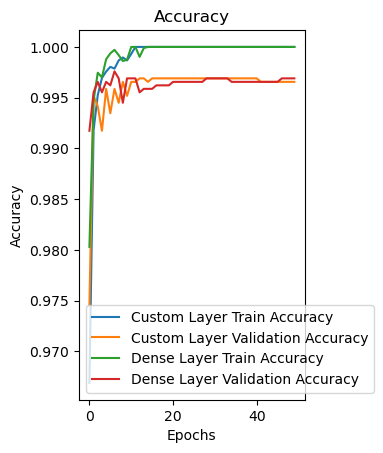

In [16]:
# دقت
plt.subplot(1, 2, 1)
plt.plot(history_custom_layer.history['accuracy'], label='Custom Layer Train Accuracy')
plt.plot(history_custom_layer.history['val_accuracy'], label='Custom Layer Validation Accuracy')
plt.plot(history_dense.history['accuracy'], label='Dense Layer Train Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Dense Layer Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

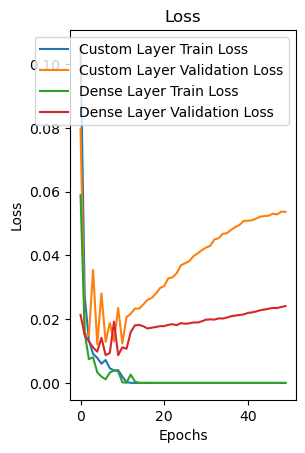

In [17]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history_custom_layer.history['loss'], label='Custom Layer Train Loss')
plt.plot(history_custom_layer.history['val_loss'], label='Custom Layer Validation Loss')
plt.plot(history_dense.history['loss'], label='Dense Layer Train Loss')
plt.plot(history_dense.history['val_loss'], label='Dense Layer Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()